<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/adam-migration-to-pytorch/machine_learning/lesson%201%20-%20linear%20regression/examples/linear_regression_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
<figure>
<img src='https://media.makeameme.org/created/brace-yourself-regression-599599.jpg' width='50%' height='50%'></img>
</figure>


Perhaps the most natural machine learning task to wrap our heads around is *regression*--a set of methods for modeling the relationship between one or more independent variables (i.e., $x$) and a dependent variable (i.e., $y$). Regression problems pop up whenever we want to output a *numeric* value. 

Most applications of regression fall into one of the following two broad categories:
- *inference* - to explain the relationship between the inputs and outputs (most common).
- *prediction* - to predict numeric outputs given inputs (most common in machine learning). 

A few everyday examples of regression include predicting prices (of homes, stocks, etc.), predicting length of stay (for patients in the hospital), and demand forecasting (for retail sales). 

## Linear Regression
<figure>
<img src='https://learningstatisticswithr.com/book/lsr_files/figure-html/regression1a-1.png' width='60%'></img>
</figure>


*Linear regression* is probably the simplest and most popular regression method. It is called "linear" regression because we **assume** that the relationship between the independent variables $x$ and the dependent variable  $y$ is linear--that is, $y$ can be expressed as a *weighted sum* of the elements in $x$, plus some *noise* in the data. In mathematical terms this can be expressed as: $$y = wx + b$$
where $w$ represents the learnable *weights* and $b$ the *bias* (i.e., you may recognize it as the *intercept*). The weights determine the influence of each feature on the prediction and the bias tells us what the predicted value would be if all the features $x$ values were 0. Given features of a training dataset  $X$  and corresponding (known) labels  $y$ , the goal of linear regression is to find the weight vector $w$  and the bias term  $b$  that given features of a new data sample from the dataset  $X$, the sample's label will (in expectation) be predicted with the lowest *error*.

To motivate the linear regression approach, suppose that we wish to estimate the prices of houses (in dollars) based on their area (in square feet). To actually fit a model for *predicting* house prices, we need to get our hands on a dataset consisting of sales for which we know the sale price and area for each home. In machine learning terminology, the dataset is called a *training dataset* or *training set*, and each row (the data corresponding to one sale) is called a *sample*. The thing we are trying to predict (price) is called a *label* (or *target*). The independent variables (only one in this case--area), upon which the predictions are based, are called *features*. 

Generally, we will use  $n$  to denote the total number of samples in our dataset. We index a sample by $i$, denoting each sample as  $x^{(i)}=[x^{(i)}_{1}]^{⊤}$  ($x^{(i)}_{1}$ represents the area) and the corresponding label as $y^{(i)}$.


## Linear Model


To make the above linear regression formula more concrete, let's translate it to our house prices example: 
$$\text{price} = w_{\text{area}}\cdot{area} + b $$
where $w_{\text{area}}$ is the learnable *weight* and $b$ is the *bias* (or *intercept*).

The goal is to choose the weight  $w$  and the bias  $b$  such that on average, the predictions made according to our model *best fit* the true prices observed in the data. 

Before we can go about searching for the best *parameters*  $w$  and  $b$, we will need two more things: (i) a way to measure the quality of the model; and (ii) a procedure for updating the model parameters to improve its accuracy.

# Loss Function
<figure>
<img src='https://d2l.ai/_images/fit_linreg.svg
' width='60%'></img><figcaption>Calculating loss: measuring the distance between the predicion and real value</figcaption>
</figure>


Before we build our model, we need to determine a measure of fitness. The *loss function* quantifies the distance between the *true* and *predicted* value of the *target*. The loss will usually be a non-negative number where smaller values are better and perfect predictions incur a loss of  0 . The most popular loss function in regression problems is the *sum of squared errors* (SSE). When our prediction for an example  $i$  is  $\hat{y}^{(i)}$  and the corresponding true label is  $y^{(i)}$ , the squared error is given by:
$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

The constant  1/2  makes no real difference but makes some future math more convenient, cancelling out when we take the *derivative* of the loss (don't worry if you don't know about derivatives yet). To make things more concrete, consider the example above where we plot a regression problem, the blue line corresponds to the prediction vs true value. 

To measure the quality of a model on the entire dataset, we simply *average* (or equivalently, sum) the losses on the training set.

$$
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.
$$

When training the model, we want to find parameters ( $w^{∗}$,$b^{∗}$ ) that minimize the total loss across all training examples:

$$
\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).
$$

But how do actualy find the best parameters to minimize the total loss? We'll use *gradient descent*--a fundemental concept in modern machine learning, particularly *deep learning*.


# Gradient Descent

<figure>
<img src='https://media0.giphy.com/media/O9rcZVmRcEGqI/source.gif' width='100%'></img><figcaption>Gradient descent: finding the best model parameters</figcaption>
</figure>

The key technique for optimizing nearly any deep learning model, and we can use for linear models too, consists of *iteratively* reducing the error by updating the parameters in the *direction* that incrementally *lowers* the loss function. This algorithm is called *gradient descent*. In general, we can find acceptable parameter values after many interations of reducing the loss.

The most naive application of gradient descent consists of taking the derivative of the true loss, which is an average of the losses computed on every single example in the dataset. In practice, this can be extremely slow. We must pass over the entire dataset before making a single update. Thus, we will often settle for sampling a random *batch* of samples every time we need to compute the update, this method is called *stochastic gradient descent*.


At a high level, the *stochastic gradient descent* method consists of feeding a random batch of samples to the model, computing the derivative (gradient) of the average loss with respect to the batch samples and the model's current parameter values. Finally, we update the model parameters by multiplying the gradient by a predetermined value called the *learning rate* $ > 0$ and substract the resulting output from the current parameter values.  

Let's summarize the steps of *stochastic gradient descent*: 
1. We initialize the values of the model parameters, typically with random values.
2. We iteratively sample random batches from the data (many times), updating the parameters in the direction of the negative gradient.
3. After many iterations, we hope that the estimated model parameters ($\hat{w}, \hat{b}$, the "hat" symbol denotes estimates) can produce acceptable predictions (close enough to the true values).

Linear regression can actually be solved using a simpler method than stochastic gradient descent, but the stochastic gradient descent algorithm is so fundemental to deep learning that we will use it for linear regression too. 


# Linear Regression: What makes us happy?
Now let's apply the linear regression method to a real-world problem--predicting life expectancy given features corresponding to a country's education system. To fit a model, the process involves several steps: 

1. Find a dataset related to our question. 
2. Explore the dataset - clean the data and visualize it (if possible).
3. Prepare data for a *model*.
4. Build a model. 
5. Train the model using an algorithm such as stochastic gradient descent.
6. Evaluate the quality of our model.
7. Draw conclusions. 

For step 1, we found a dataset detailing [Life Expentacy(WHO)](https://www.kaggle.com/kumarajarshi/life-expectancy-who) in different countries in the world. The dataset contains information like alcohol intake, BMI, GDP, and schooling . Pretty cool right! Next, we explore the dataset and define our $x$ and $y$ variables. Then, we build a linear regression model. Following, we train the model using stochastic gradient descent. Finally we evaluate the model and draw conclusions.

In [50]:
# import the libraries we be need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# PyTorch
import torch
import torch.nn as nn

## 1. Explore + Visualize the dataset

In [51]:
# load the dataset into a dataframe
data_url = 'https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/adam-migration-to-pytorch/datasets/Life%20Expectancy%20Data.csv'
df = pd.read_csv(data_url)
df.columns = [col_name.strip() for col_name in df.columns] # used to fix weird spaces in the column names
df.head() # view the first 5 rows of the data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
# how many rows and columns are in the dataset
df.shape # looks like 2938 rows and 22 columns

(2938, 22)

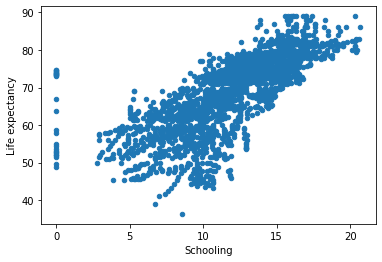

In [53]:
# visualize a scatter plot of Schooling and Life expectancy
df.plot.scatter(x='Schooling', y='Life expectancy');

The relationship between number of years of schooling and life expectancy seems relatively linear. Let's build a linear model to predict life expectancy using the number of years in schooling feature. Before we do, we need to prepare the training and test dataset our model will use. Especially, we see here that there are data points that have 0 years of schooling that are different from others, these data points are called *outliers*.

We will look at these outliers then delete it from the dataframe and any rows with missing values to build the linear model. This process of removing values of the dataset is called *cleaning* the data.

In [54]:
# Looking at the countries with 0 years of schooling
df.loc[df.Schooling == 0.0, 'Country'].value_counts()

South Sudan                         11
Antigua and Barbuda                  6
Montenegro                           4
Turkmenistan                         1
Tuvalu                               1
Equatorial Guinea                    1
Bosnia and Herzegovina               1
Timor-Leste                          1
Marshall Islands                     1
Micronesia (Federated States of)     1
Name: Country, dtype: int64

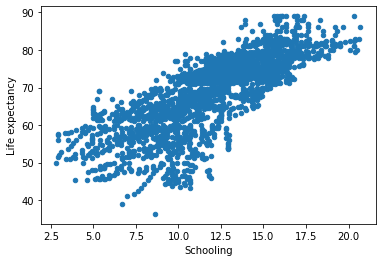

In [55]:
# Removing those rows above with 0 years of schooling
df = df.loc[df.Schooling > 0.0, :]

# Removing rows that have missing values for the columns of schooling and life expectancy
df = df.loc[~(df.Schooling.isna() | df['Life expectancy'].isna()), :]
# Plotting the same plot again
df.plot.scatter(x='Schooling', y='Life expectancy');

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2742 non-null   object 
 1   Year                             2742 non-null   int64  
 2   Status                           2742 non-null   object 
 3   Life expectancy                  2742 non-null   float64
 4   Adult Mortality                  2742 non-null   float64
 5   infant deaths                    2742 non-null   int64  
 6   Alcohol                          2569 non-null   float64
 7   percentage expenditure           2742 non-null   float64
 8   Hepatitis B                      2253 non-null   float64
 9   Measles                          2742 non-null   int64  
 10  BMI                              2721 non-null   float64
 11  under-five deaths                2742 non-null   int64  
 12  Polio               

## Prepare the Dataset 

In [57]:
# define the x and y variables 
x_col = 'Schooling'
y_col = 'Life expectancy'

# split the dataset into a training set and a test set.
# we will use the test set in the final evaluation of our model.
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

# Splitting training data into validation data
valid = train.sample(frac=0.1, random_state=0)
train = train.drop(valid.index) # Deleting rows sampled for validation data

# separate the x (features) and y (labels) in the train/valid/test datasets
train_features = torch.tensor(train[x_col].values.reshape(-1, 1), dtype=torch.float)
test_features = torch.tensor(test[x_col].values.reshape(-1, 1), dtype=torch.float)
valid_features = torch.tensor(valid[x_col].values.reshape(-1, 1), dtype=torch.float)

train_labels = torch.tensor(train[y_col].values.reshape(-1, 1), dtype=torch.float)
test_labels = torch.tensor(test[y_col].values.reshape(-1, 1), dtype=torch.float)
valid_labels = torch.tensor(valid[y_col].values.reshape(-1, 1), dtype=torch.float)

print('train features shape:', train_features.shape)
print('train labels shape:', train_labels.shape)

print('validation features shape:', valid_features.shape)
print('validation labels shape:', valid_labels.shape)

print('test features shape:', test_features.shape)
print('test labels shape:', test_labels.shape)

print('first 5 test labels:\n', test_labels[:5])

train features shape: torch.Size([1975, 1])
train labels shape: torch.Size([1975, 1])
validation features shape: torch.Size([219, 1])
validation labels shape: torch.Size([219, 1])
test features shape: torch.Size([548, 1])
test labels shape: torch.Size([548, 1])
first 5 test labels:
 tensor([[65.0000],
        [59.5000],
        [58.1000],
        [76.2000],
        [75.9000]])


The above code returns a training, validation, and test datasets. The Schooling variable represents the  *features* data and the Life expectancy variable represents the *labels*. There are three datasets--a *training dataset*, a *validation dataset* and a *test dataset*. The `train_features` and `train_labels` arrays represent the features and labels of the training dataset, each containing 1978 rows and 1 column. The `valid_features` and `valid_labels` arrays represent the features and labels of the validation dataset, each containing 220 rows and 1 column.  The `test_features` and `test_labels` arrays represent the features and labels of the test dataset, each containing 549 rows and 1 column.  

Now that we have the *features* and *labels* separated, we are ready to build our model!

## 2. Building a model

Before we model the relationship between Schooling and Life expectancy, let's write what we know about single-variable linear regression. In short, single-variable linear regression tries to find a function that best fits our data (i.e., between an $x$ and $y$ variable). It is defined by the following formula: 
$$
y = wx + b
$$

We can translate this function to our problem to model the relationship between Schooling ($x$) and Life expectancy ($y$) as follows:

$$ 
\text{Life Expectancy} = w_{\text{Schooling}} \cdot \text{Schooling} + b
$$

Coding linear regression from scratch can be tedious: we'd need to manually define the parameters (weights and bias), compute gradients, and update the parameters. Fortunately, there are amazing open source libraries we can use to make this process a bit easier.

We'll be using [PyTorch](https://pytorch.org/), a Deep Learning library to build and evaluate our linear regression model in the form of neural network. We will create our own `LR_Model` class to define a container for the *layers* of our model. There are two sections to the class, the constructor and the forward method. The constructor is used define the layers, we use using `nn.Linear` class to define those layers. The `forward` method is used to take your input and then you pass that input through your layers to return an output. We don't really need to use this model structure for linear regression (as you saw last lesson). Nonetheless, nearly every model we build in this series will be similar to this lesson so we will use it from here on out.


In [58]:
# build the linear model 
class LR_Model(nn.Module):
    # Defining Constructor
    def __init__(self):
        super(LR_Model, self).__init__()

        # Defining Layers
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)

# Initializing model
model = LR_Model()

print('Model Summary')
print(model)

Model Summary
LR_Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


<!-- TODO: fix figure to one node -->
<figure>
<img src='https://d2l.ai/_images/singleneuron.svg' width='50%'></img><figcaption>Linear Regression: a single-layer neural network</figcaption>
</figure>

The model we defined above is a linear model, we could also call it a single-layer *fully-connected* neural network. We defined it using the [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) class. Note that we passed two arguments into the `torch.nn.Linear` class. The first one specifies the input feature dimension, which is 1 (GDP per capita), and the second one is the output feature dimension, which is a single scalar and therefore 1. 

### Loss Function

After defining the model, we need to configure the *loss function*. We will use the mean squared loss, which returns the averaged loss over samples. Here we use PyTorch built-in Mean Squared Error loss function defined as the class [torch.nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss).

In [59]:
loss_fn = nn.MSELoss()

### Optimization Algorithm
Now that we have a loss function, we need to define an *opimization algorithm*. Specifically, we will use *stochastic gradient descent* to optimize our model. In other words, we use *stochastic gradient descent* to update the model parameters. We also define the *learning rate* as 0.01. We use [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) class to be used as the optimizer.

In [60]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## 4. Train the model
Now that we have a model, it's time to train it. We will train the model for 100 *epochs* (i.e., iterations), and record the training losses for every epoch.

In [61]:
epochs = 100
train_losses = []
valid_losses = []
for epoch in range(1, epochs+1):

    ###################
    # train the model #
    ###################

    # Setting model to train mode
    model.train()
    
    # Setting all gradients to zero
    optimizer.zero_grad()

    # Calculate Output
    train_predictions = model(train_features)
        
    # Calculate Loss
    train_loss = loss_fn(train_predictions, train_labels)

    # Calculate Gradients
    train_loss.backward()

    # Perform Gradient Descent Step
    optimizer.step()

    ######################    
    # validate the model #
    ######################

    # Setting model to evaluation mode, no parameters will change
    model.eval()

    # Calculate Output
    valid_predictions = model(valid_features)

    # Calculate Loss
    valid_loss = loss_fn(valid_predictions, valid_labels)

    # Saving Losses
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)


    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 4980.453125 	Validation Loss: 2421.373779
Epoch: 2 	Training Loss: 2418.057617 	Validation Loss: 1226.493530
Epoch: 3 	Training Loss: 1211.239502 	Validation Loss: 665.239075
Epoch: 4 	Training Loss: 642.855469 	Validation Loss: 401.926758
Epoch: 5 	Training Loss: 375.152161 	Validation Loss: 278.609833
Epoch: 6 	Training Loss: 249.059174 	Validation Loss: 221.002777
Epoch: 7 	Training Loss: 189.660004 	Validation Loss: 194.189743
Epoch: 8 	Training Loss: 161.671387 	Validation Loss: 181.774612
Epoch: 9 	Training Loss: 148.476166 	Validation Loss: 176.068222
Epoch: 10 	Training Loss: 142.248062 	Validation Loss: 173.472031
Epoch: 11 	Training Loss: 139.301346 	Validation Loss: 172.306595
Epoch: 12 	Training Loss: 137.899963 	Validation Loss: 171.791733
Epoch: 13 	Training Loss: 137.226425 	Validation Loss: 171.567291
Epoch: 14 	Training Loss: 136.895706 	Validation Loss: 171.468643
Epoch: 15 	Training Loss: 136.726410 	Validation Loss: 171.421661
Epoch: 16 	Tra

We get to ~168 validation mean squared error after training for 100 epochs on the training dataset. Let's check the model's training progress by looking at a plot of the validation loss.



Let's visualize it too.

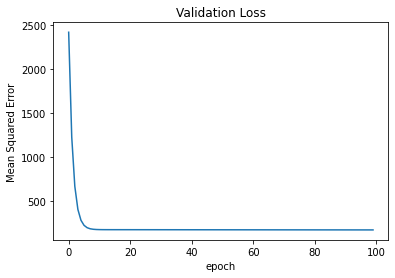

In [62]:
#hist.plot.line(x='epoch', y='val_mean_squared_error');
plt.plot(valid_losses)
plt.xlabel('epoch')
plt.ylabel('Mean Squared Error')
plt.title('Validation Loss')
plt.show()

From the plot we can see that our model *converged* just before the 30th epoch. In other words, the most optimal parameters (weights and bias)were found ofter 10 training iterations. 

## 5. Evaluate the model
Now that we trained our model, it's time to evaluate it by using the *test* dataset, which we did not use when training the model. This gives us a sense of how well our model predicts unseen data, which is the case when we use it in the real world. We will use the `evaluate` method to test the model. 

In [63]:
# Setting model to evaluation mode
model.eval()

# Getting Predictions
test_predictions = model(test_features)

# Calculating loss, which is the Mean Squared Error
loss = loss_fn(test_predictions, test_labels)

print('Test set Mean Absolute Error: ', round(loss.item(), 4))

Test set Mean Absolute Error:  131.6927


The mean squared error is around ~133 for the testind data. Is this good? We'll leave that decision up to you. Let's also visualize the prediction and real life expectancy values using data in the test set.

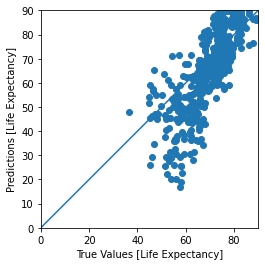

In [64]:
# Flattening test predictions
test_predictions = test_predictions.flatten().detach().numpy()

# Getting higher boundary
if max(test_labels) < max(train_labels):
    higher_boundary_lim = int(max(train_labels))
else:
    higher_boundary_lim = int(max(test_labels))

ax = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Life Expectancy]')
plt.ylabel('Predictions [Life Expectancy]')

lims = [0, higher_boundary_lim + 1] # [0, 90]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

It looks like our model predicts reasonably well but it could be better. Let's take a look at the error distribution.

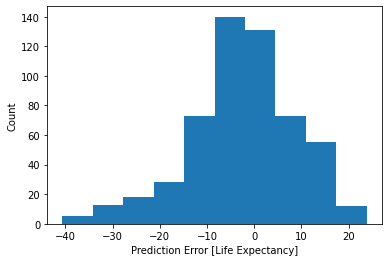

In [65]:
error = test_predictions - test_labels.flatten().detach().numpy()
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [Life Expectancy]")
_ = plt.ylabel("Count")

The histogram shows that the errors aren't quite *Normally distributed* (also called *gaussian*), but we might expect that because the number of samples is very small.

## 6. Draw Conclusions
We built a single-layer fully-connected neural network model to predict life expectancy given a country's education system. The model converged after about 10 epochs of training, and it achieved a mean squared error of ~168. We expect that a *deeper* model or more data samples or features could lead to better results on unseen data.     

# Summary
In this lesson we took a deeper dive into regression, translating traditional linear  regression into a single-layer fully-connected neural network. We covered several important techniques to handle regression problems:
- Introduced *loss functions* and *optimization algorithms*.
- Demonstrated preparing data for a model.
- Used PyTorch to build and train a model. 
- Showed how to evaluate a model.